In [1]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import env
from pydataset import data
import scipy
import os
from sklearn.model_selection import train_test_split
# turn off pink boxes for demo
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

# import our own acquire module
from acquire import get_telco_data
from prepare import split_telco_data
from prepare import prep_telco

## Telco Data set is now defined as DF

# Plan

### SUMMARY

Codeup Data Science Team has requested a further exploration & understanding into Churn in the Telco Data set.

They have requested that we find drivers for customer churn at Telco. Why are customers churning?

1) what are the main drivers of churn?

2) follow the bread crums that drive churn and make visuals?

3) what services have the highest churn levels?

### GOALS

Project goals:

1) Identify Churn drivers 

2) Creating a detailed Readme.md file to guide the reader into a further analysis of the data.

3) a CSV file that predicts churn.

4) .py files that go into detail with how the data was prepared and cut.

# ---------------------------------------------------------------------------------------------

### ACQUIRE

In [2]:
df = get_telco_data()
df.head()

,internet_service_type_id,payment_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,payment_type,internet_service_type
0,1,2,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,Mailed check,DSL
1,1,2,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,Mailed check,DSL
2,2,1,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Electronic check,Fiber optic
3,2,1,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Electronic check,Fiber optic
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Mailed check,Fiber optic


In [3]:
train, validate, test = prep_telco(df)
train

,internet_service_type_id,payment_type_id,contract_type_id,customer_id,gender,senior_citizen,dependents,tenure,multiple_lines,tech_support,...,total_charges,churn,gender_Male,dependents_Yes,multiple_lines_No phone service,multiple_lines_Yes,tech_support_No internet service,tech_support_Yes,paperless_billing_Yes,churn_Yes
5919,1,4,2,8331-ZXFOE,Female,0,No,58,Yes,Yes,...,4299.20,No,0,0,0,1,0,1,1,0
1915,2,4,2,2790-XUYMV,Male,0,Yes,71,Yes,No,...,6028.95,No,1,1,0,1,0,0,1,0
5054,3,1,1,7107-UBYKY,Female,0,Yes,35,Yes,No internet service,...,882.55,No,0,1,0,1,1,0,1,0
2355,3,2,1,3373-YZZYM,Male,0,Yes,1,No,No internet service,...,19.20,No,1,1,0,0,1,0,0,0
6279,1,2,2,8883-GRDWQ,Male,1,No,20,No,Yes,...,1055.90,No,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,2,4,1,0581-MDMPW,Female,0,No,24,Yes,No,...,2072.75,No,0,0,0,1,0,0,1,0
3763,2,1,1,5299-RULOA,Female,0,Yes,10,Yes,No,...,1064.65,Yes,0,1,0,1,0,0,1,1
3444,3,4,3,4883-KCPZJ,Female,0,Yes,22,Yes,No internet service,...,555.40,No,0,1,0,1,1,0,0,0
1002,2,4,1,1452-KIOVK,Male,0,Yes,22,Yes,No,...,1949.40,No,1,1,0,1,0,0,1,0


# ---------------------------------------------------------------------------------------------

# Prepare

## Preparing the data

#### Using functions from prepare.py

- we have removed the null values 
- replaced yes and no values with 1 and 0 for the data to be processed and analized correctly 
- data from internet, service and payment type have been transformed and defined below
- data has also been split for testing and statistical predcitions 

#### Gender to gender_Male: 1 = Male, 0 = Female

#### Churn to churn_Yes:  1 = has churn, 0 = no churn

#### Internet Service type: 1 = DSL, 2 = Fiber optic, 3 = None 

#### Contract type: 1 = Month-to-month, 2 = One year, 3 = Two year

#### Payment Type: 1 = Electronic check, 2 = Mailed check, 3 = Bank transfer (automatic), 4 = Credit card (automatic)

### Senior citizen: 0 = Not a senior citizen 1 = is a senior citizen

In [4]:
train = train.drop(columns= ['customer_id','dependents','gender','multiple_lines','tech_support','paperless_billing'])

train = train.replace({'Yes':1, 'No':0})

validate = validate.drop(columns= ['customer_id','dependents','gender','multiple_lines','tech_support','paperless_billing',])

validate = validate.replace({'Yes':1, 'No':0})

test = test.drop(columns= ['customer_id','dependents','gender','multiple_lines','tech_support','paperless_billing',])

test = test.replace({'Yes':1, 'No':0})

In [5]:

# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['churn','churn_Yes'])
y_train = train.churn_Yes

X_validate = validate.drop(columns=['churn','churn_Yes'])
y_validate = validate.churn_Yes

X_test = test.drop(columns=['churn','churn_Yes'])
y_test = test.churn_Yes

# ------------------------------------------------------------------------

# Data Exploration

In [6]:
train.churn_Yes.value_counts()

0    2891
1    1046
Name: churn_Yes, dtype: int64

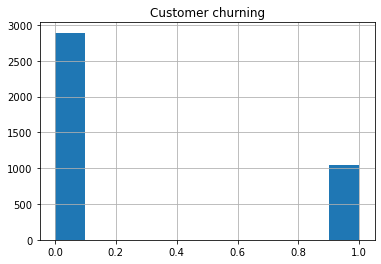

In [7]:
plt.title("Customer churning")
train.churn_Yes.hist()
plt.show()

### Take away: 2891 customers stayed and 1046 have left this month, resulting in 26.5% churn

# ---------------------------------------------------------------------------------------------

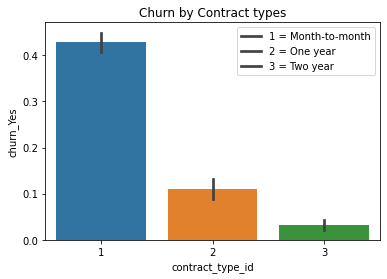

In [8]:
plt.title("Churn by Contract types")
sns.barplot(x="contract_type_id", y="churn_Yes", data=train)
churn_rate = train.churn.mean()
plt.legend(["1 = Month-to-month","2 = One year","3 = Two year"])
plt.annotate
plt.show()

- **Take away: Month to month seems to have large churn rates**

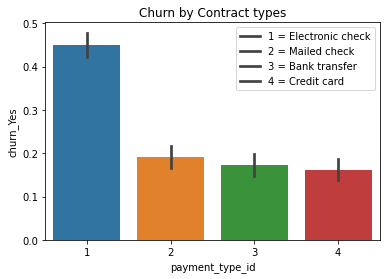

In [9]:
plt.title("Churn by Contract types")
sns.barplot(x="payment_type_id", y="churn_Yes", data=train)
churn_rate = train.churn.mean()
plt.legend(["1 = Electronic check", "2 = Mailed check", "3 = Bank transfer", "4 = Credit card"])
plt.show()

- **Take away: Electronic check has the highest churn rates out of the 4 contract types**

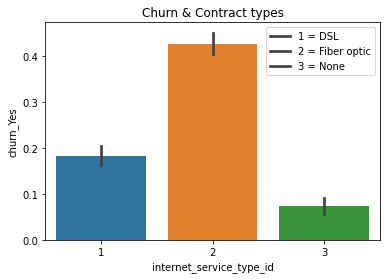

In [10]:
plt.title("Churn & Contract types")
sns.barplot(x="internet_service_type_id", y="churn_Yes", data=train)
churn_rate = train.churn.mean()
plt.legend(["1 = DSL", "2 = Fiber optic", "3 = None"])
plt.show()

- **Take away: Fiber optic has a high churn rate.**

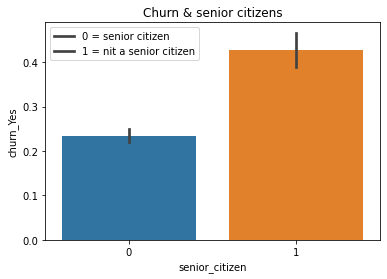

In [11]:
plt.title("Churn & senior citizens")
sns.barplot(x="senior_citizen", y="churn_Yes", data=train)
churn_rate = train.churn.mean()
plt.legend(["0 = senior citizen", "1 = nit a senior citizen"])
plt.show()

- **senior citizens have a high churn rate**

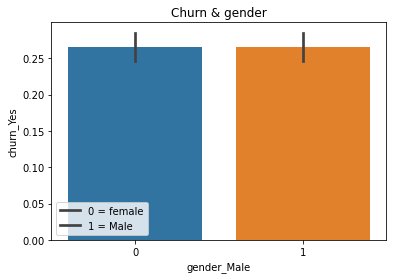

In [12]:
plt.title("Churn & gender")
sns.barplot(x="gender_Male", y="churn_Yes", data=train)
churn_rate = train.churn.mean()
plt.legend(["0 = female", "1 = Male"])
plt.show()

- **there is no correlation between gender and churn**

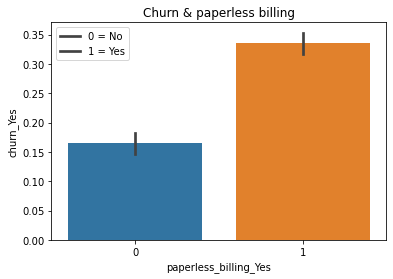

In [13]:
plt.title("Churn & paperless billing")
sns.barplot(x="paperless_billing_Yes", y="churn_Yes", data=train)
churn_rate = train.churn.mean()
plt.legend(["0 = No", "1 = Yes"])
plt.show()

- **paperless billing has a correlation with churn**

## Data exploration summary & Take aways 

#### - Customers churning is 1046/3937 = % 26.5 of customers
#### - Month to month seems to have large churn rates
#### - Electronic check has the highest churn rates out of the 4 contract types
#### - Fiber optic has a high churn rate
#### - paperless billing has a high churn value





# ---------------------------------------------------------------------------------------------

## Hypothesis Testing and Analysis

In [14]:
alpha = 0.05

### Contract Types
- ${h_o}$ = Contract types and churn are independent of eachother
- ${h_a}$ = There is a relationship between Contract types and churn

In [15]:
null_hypothesis = "Contract types and churn are independent of eachother"
alternative_hypothesis = "There is a relationship between Contract types and churn"
observed = pd.crosstab(train.churn_Yes, train.contract_type_id)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")
p

Reject the null hypothesis that Contract types and churn are independent of eachother
Sufficient evidence to move forward understanding that There is a relationship between Contract types and churn


4.693667062132269e-145

----------------------------------------------------------------------------------------------------------------------

### Payment types
- ${h_o}$ = Payment types and churn are independent of eachother
- ${h_a}$ = There is a relationship between Payment types and churn

In [16]:
null_hypothesis = "Payment types and churn are independent of eachother"
alternative_hypothesis = "There is a relationship between Payment types and churn"
observed = pd.crosstab(train.churn_Yes, train.payment_type_id)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")
p

Reject the null hypothesis that Payment types and churn are independent of eachother
Sufficient evidence to move forward understanding that There is a relationship between Payment types and churn


4.64358817076333e-73

----------------------------------------------------------------------------------------------------------------------

### internet service types
- ${h_o}$ = internet service type and churn are independent of eachother
- ${h_a}$ = There is a relationship between internet service type and churn

In [17]:
null_hypothesis = "internet service type and churn are independent of eachother"
alternative_hypothesis = "There is a relationship between internet service type and churn"
observed = pd.crosstab(train.churn_Yes, train.internet_service_type_id)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")
p

Reject the null hypothesis that internet service type and churn are independent of eachother
Sufficient evidence to move forward understanding that There is a relationship between internet service type and churn


3.2062272759526154e-96

----------------------------------------------------------------------------------------------------------------------

### Senior Citizen
- ${h_o}$ = senior citizens and churn are independent of eachother
- ${h_a}$ = There is a relationship between senior citizens and churn

In [18]:
null_hypothesis = "senior citizens and churn are independent of eachother"
alternative_hypothesis = "There is a relationship between senior citizens and churn"
observed = pd.crosstab(train.churn_Yes, train.senior_citizen)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")
p

Reject the null hypothesis that senior citizens and churn are independent of eachother
Sufficient evidence to move forward understanding that There is a relationship between senior citizens and churn


1.7561315684822571e-23

----------------------------------------------------------------------------------------------------------------------

### Gender 
- ${h_o}$ = gender and churn are independent of eachother
- ${h_a}$ = There is a relationship between gender and churn

In [19]:
null_hypothesis = "gender and churn are independent of eachother"
alternative_hypothesis = "There is a relationship between gender and churn"
observed = pd.crosstab(train.churn_Yes, train.gender_Male)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")
p

Fail to reject the null
Insufficient evidence to reject the null


1.0

----------------------------------------------------------------------------------------------------------------------

### Paperless billing
- ${h_o}$ = Paperless billing and churn are independent of eachother
- ${h_a}$ = There is a relationship between paperless billing and churn

In [20]:
null_hypothesis = "Paperless billing and churn are independent of eachother"
alternative_hypothesis = "There is a relationship between paperless billing and churn"
observed = pd.crosstab(train.churn_Yes, train.paperless_billing_Yes)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")
p

Reject the null hypothesis that Paperless billing and churn are independent of eachother
Sufficient evidence to move forward understanding that There is a relationship between paperless billing and churn


1.3393723943150956e-32

## Take aways
#### - contract types rejected the null hypothesis
#### - payment types rejected the null hypothesis
#### - internet service types rejected the null hypothesis
#### - gender has no relationship with churn
#### - paperless, senior citizen has a minor relationship with churn

# ---------------------------------------------------------------------------------------------

# Modeling

In [21]:
clf = DecisionTreeClassifier(max_depth=4, random_state=123)
baseline_accuracy = (train.churn_Yes == 0).mean()
print(f"Baseline accuracy: {round(baseline_accuracy, 2)}")

Baseline accuracy: 0.73


In [22]:
clf = clf.fit(X_train, y_train)

In [23]:
# Make the model
tree1 = DecisionTreeClassifier(max_depth=10, random_state=123)

# Fit the model (on train and only train)
tree1 = tree1.fit(X_train, y_train)

# Use the model
# We'll evaluate the model's performance on train, first
y_predictions = tree1.predict(X_train)


### Baseline

In [24]:
baseline_prediction = y_pred_proba = clf.predict_proba(X_train)

### Acurracy

### Random Forest for test and validate

In [25]:
metrics = []
max_depth = 18

for i in range(2, max_depth):
    depth = max_depth - i
    n_samples = i
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf= n_samples,random_state=123)
    
    forest = forest.fit(X_train, y_train)
    
    in_sample_accuracy = forest.score(X_train,y_train)
    
    out_of_sample_accuracy = forest.score(X_validate,y_validate)
    
    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    metrics.append(output)
    
df1 = pd.DataFrame(metrics)
df1["difference"] = df1.train_accuracy - df1.validate_accuracy
df1

,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,2,16,0.932690,0.780213,0.152477
1,3,15,0.892812,0.792654,0.100158
2,4,14,0.872746,0.796209,0.076537
3,5,13,0.859284,0.790877,0.068407
4,6,12,0.852680,0.790284,0.062395
5,7,11,0.842012,0.790877,0.051135
6,8,10,0.834900,0.789100,0.045800
7,9,9,0.831090,0.791469,0.039620
8,10,8,0.823724,0.792062,0.031662
9,11,7,0.817374,0.793246,0.024127


In [26]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=13,
                            n_estimators=100,
                            max_depth=5, 
                            random_state=123)


In [27]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_train)
y_pred_proba = rf.predict_proba(X_train)


In [28]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))


Accuracy of random forest classifier on training set: 0.81


In [29]:
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(rf.score(X_validate, y_validate)))


Accuracy of random forest classifier on test set: 0.79


## Takeaways
#### - Baseline 73%
#### - Randomforest classifier min_sample_leaf = 13 and max_depth = 5
#### - results in 81% accuarcy in train values and 79% in validate, which has a more leveled field


# Knn

In [30]:
# weights = ['uniform', 'density']
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [31]:
y_pred = knn.predict(X_train)
y_pred_proba = knn.predict_proba(X_train)

In [32]:
import matplotlib.pyplot as plt
k_range = range(1, 18)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy = knn.score(X_train, y_train)
    validate_accuracy = knn.score(X_validate,y_validate)
    output = {
        "k": k,
        "train_accuracy": train_accuracy,
        "validate_accuracy": validate_accuracy
    }
    scores.append(output)
ddd = pd.DataFrame(scores)
ddd['difference'] = ddd.train_accuracy - ddd.validate_accuracy
ddd
#plt.figure()
#plt.xlabel('k')
#plt.ylabel('accuracy')
#plt.scatter(k_range, scores)
#plt.xticks([0,5,10,15,20])
#plt.show()

,k,train_accuracy,validate_accuracy,difference
0,1,0.997968,0.704384,0.293584
1,2,0.859792,0.748223,0.111569
2,3,0.856744,0.742299,0.114445
3,4,0.832614,0.768365,0.064249
4,5,0.830582,0.758294,0.072288
5,6,0.820676,0.768365,0.052311
6,7,0.820168,0.771327,0.048841
7,8,0.815088,0.778436,0.036652
8,9,0.817374,0.777251,0.040122
9,10,0.808992,0.773104,0.035887


In [33]:
ddd[ddd.difference == ddd.difference.min()]

,k,train_accuracy,validate_accuracy,difference
14,15,0.801626,0.780213,0.021412


## Take away
#### - the 80% train accuracy and 78% on validate our best bet for a leveled knn test

# Conclusion
### - 2891 customers stayed and 1046 have left this month, resulting in 26.5% churn.
### - contract types, payment types, and internet service types have the highest correlation with churn.
### - Random forest tree seems the best way to predict churn.

#### Recomendations:
1) Push for 1 or two year contracts.

2) Try to eliminate the electronic check option for customers.

3) Fiber optic internet has a high churn rate, lets check up on the cutomers weather its due to service or connectivity.

please take note that there is a predictive model called probability_of_churn_in_telco in following link https://github.com/EribertoContreras/predicting_telco_churn to reduce churn values and predict better outcomes.